# First Order System 
## Frequency Response

The frequency response $H(f)$ for a firstorder system is 
\begin{equation}
    H(f) = \frac{1}{1 + j\omega\tau} = \frac{1}{1 + j\frac{f}{f_c}}
\end{equation}
The time constant for the system is $\tau$.
The -3 dB cut-off frequency $f_c$ is given from the time constant $\tau$ as $\omega_c = \frac{1}{\tau}$ or
\begin{equation}
    f_c = \frac{\omega_c}{2\pi} = \frac{1}{2\pi \tau}
\end{equation}

In [18]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

# Load modules for intereactive operation
import ipywidgets as widgets

# Allow interactive figures in Matplotlig
%matplotlib ipympl    

class FrequencyResponse():
    """Demonstation of first order system frequency response.

    All calculations and plotting routines are contained in this class
    """
    def __init__(self, tau=1):
        """Initialise system parameters."""
        self.tau = tau        # Time constant
        self.n_f = 300        # Number of points in frequency vectors
        self.flim = [-1, 3]   # Frequency limits, logarithmic
        self.ax_magnitude, self.ax_phase = self.initialise_graphs()

    def initialise_graphs(self):
        """Initialise result graph ."""
        plt.close("all")
        plt.rc('font', size=10)          # Default text sizes
        fig = plt.figure(figsize=[10, 7],
                         constrained_layout=True,
                         num="First Order System - Frequency Response")
        ax_magnitude = fig.add_subplot(2, 1, 1)
        ax_phase = fig.add_subplot(2, 1, 2)
        
        for ax in [ax_magnitude, ax_phase]:    # Common for both plots
            ax.set(xlabel="Frequency [Hz]",
                   xlim=(1e-1, 1e3) )
            ax.grid(True, which='major', axis='both')
            ax.grid(True, which='minor', axis='x')

        db_min = -24
        ax_magnitude.set(ylabel="Magnitude" ,
                         ylim=(db_min, 2),
                         yticks=np.arange(db_min, 2, 3))

        phi_min = -90
        ax_phase.set(ylabel="Phase [Degrees]",
                     ylim=(phi_min, 0),
                     yticks=np.arange(phi_min, 1, 15))
        
        return ax_magnitude, ax_phase

    def f(self):
        """Create frequency vector."""
        return np.logspace(min(self.flim), max(self.flim), self.n_f)

    def fc(self):
        """Calculate cut-off frequency."""
        return 1/(2*pi*self.tau)

    def H(self):
        """Calculate frequency response."""
        return 1/(1 + 1j*self.f()/self.fc())

    def plot(self):
        """Plot result in graph."""
        for ax in [self.ax_magnitude, self.ax_phase]:
            for art in list(ax.lines):
                art.remove()
            for art in list(ax.texts):
                art.remove()

        indicator_color = "C3"
        h_db = 20*np.log10(abs(self.H()))                
        self.ax_magnitude.semilogx(self.f(), h_db, "-", color="C0")
        self.ax_magnitude.axvline(x=self.fc(), color=indicator_color, linestyle='-')
        self.ax_magnitude.axhline(y=0, color="black", linestyle='-')
        self.ax_magnitude.axhline(y=-3, color=indicator_color, linestyle='-')
        self.ax_magnitude.text( self.fc(), -20, f" $ f_c$={self.fc():.3g} Hz", color=indicator_color)

        self.ax_phase.semilogx(self.f(), np.degrees(np.angle(self.H())), "-", color="C0")
        self.ax_phase.axvline(x=self.fc(), color=indicator_color, linestyle='-')
        self.ax_phase.axhline(y=-45, color=indicator_color, linestyle='-')
        
        return


Label(value='First Order System Frequency Response', style=LabelStyle(font_weight='bold'))

FloatLogSlider(value=1.0, description='Time constant [s]', layout=Layout(width='50%'), max=1.0, min=-4.0, read…

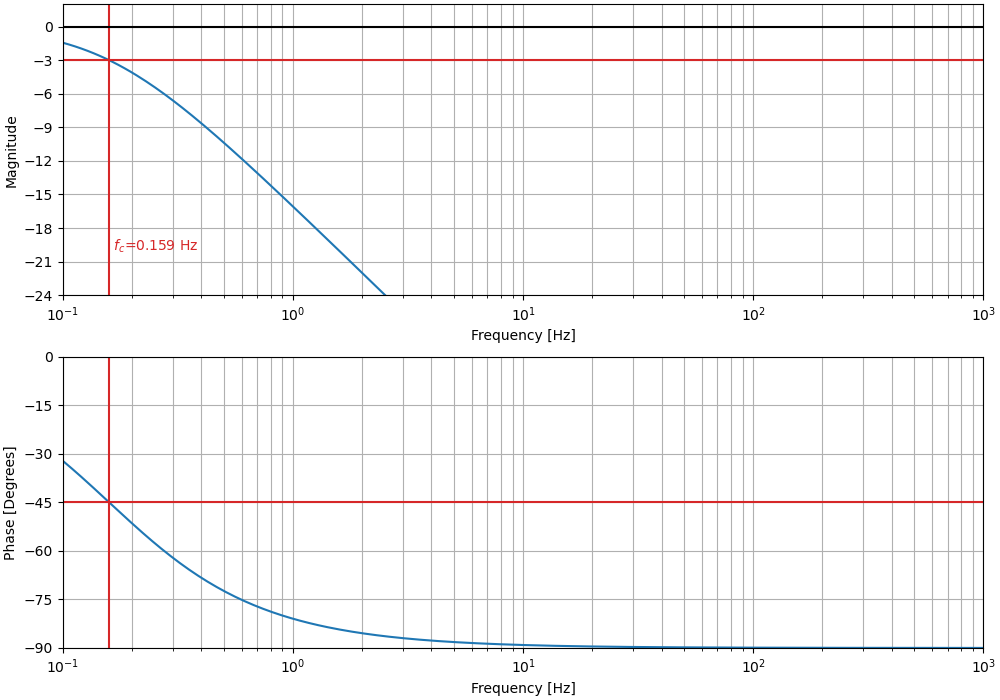

In [20]:
# Load modules for intereactive operation

#  Function that runs the demo interactively
def run_frequencyresponse(tau):
    """Set values and call plotting function."""
    freq_resp.tau = tau
    freq_resp.plot()    
    return

# Define widgets to operate program
widget_style = dict(description_width='initial')

title_widget = widgets.Label("First Order System Frequency Response", 
                             style=dict(font_weight='bold'))

tau_widget = widgets.FloatLogSlider(min=-4, max=1, value=1, step=0.01, 
                                 description='Time constant [s]',  
                                 readout_format='.2g',
                                 layout=widgets.Layout(width='50%'),
                                 style=widget_style)

display(title_widget)
display(tau_widget)

# Define signal and run demo
freq_resp = FrequencyResponse()
run_frequencyresponse(2)
w = widgets.interactive(run_frequencyresponse, tau=tau_widget)